In [174]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
#from census import Census
import json
import pprint as pprint
import seaborn as sns


In [175]:
# Understand population and age demographics for appropriate comparison between San Diego County and Dallas County

# Declaring lists of population and median age variables for counties and states
Titles=['Total','Male','Female']
CA_pop=[37253956,18517830,18736126]
TX_pop=[25145561,12472280,12673281]
SD_pop=[3095313,1553679,1541634]
DA_pop=[2368139,1171002,1197137]
CA_age=[35,34,36]
TX_age=[33,32,34]
SD_age=[34,33,36]
DA_age=[32,31,33]



In [176]:

# Generating the population Demographics table

df_pop= pd.DataFrame({"Title":Titles ,
                        "CA pop": CA_pop ,
                        "TX pop": TX_pop ,
                        "SD pop": SD_pop ,
                        "DA pop": DA_pop,
                        })
df_pop["SD(% of CA)"]=round(((df_pop["SD pop"]/df_pop["CA pop"])*100),1)
df_pop["DA(% of TX)"]=round(((df_pop["DA pop"]/df_pop["TX pop"])*100),1)
df_pop


,Title,CA pop,TX pop,SD pop,DA pop,SD(% of CA),DA(% of TX)
0,Total,37253956,25145561,3095313,2368139,8.3,9.4
1,Male,18517830,12472280,1553679,1171002,8.4,9.4
2,Female,18736126,12673281,1541634,1197137,8.2,9.4


In [177]:
# Generating Population median Age Demographics table

df_age=pd.DataFrame({"Title":Titles ,
                        "CA Age": CA_age ,
                        "TX Age": TX_age ,
                        "SD Age": SD_age ,
                        "DA Age": DA_age 
                        })
df_age["SD(% of CA)"]=round(((df_age["SD Age"]/df_age["CA Age"])*100),1)
df_age["DA(% of TX)"]=round(((df_age["DA Age"]/df_age["TX Age"])*100),1)

df_age

,Title,CA Age,TX Age,SD Age,DA Age,SD(% of CA),DA(% of TX)
0,Total,35,33,34,32,97.1,97.0
1,Male,34,32,33,31,97.1,96.9
2,Female,36,34,36,33,100.0,97.1


In [178]:
# Declaring paths to individual csv files of San Diego data for each year

file_sd_2014 = "2014 San Diego Data.csv"
file_sd_2015 = "2015 San Diego Data.csv"
file_sd_2016 = "2016 San Diego Data.csv"
file_sd_2017 = "2017 San Diego Data.csv"

In [179]:
# Reading csv and forming yearwise dataframe

sd_2014_df=pd.read_csv(file_sd_2014)
sd_2015_df=pd.read_csv(file_sd_2015)
sd_2016_df=pd.read_csv(file_sd_2016)
sd_2017_df=pd.read_csv(file_sd_2017)



In [180]:
# filtering and generating dataframe for taxi and limosine industry(code=4853)

# sd_2014 row

sd_2014_df=sd_2014_df.loc[(sd_2014_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
sd_2014_df=sd_2014_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
sd_2014_df= sd_2014_df.set_index('year').T
# Review the transposed df
sd_2014_df.head()


# sd_2015 row

sd_2015_df=sd_2015_df.loc[(sd_2015_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
sd_2015_df=sd_2015_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
sd_2015_df= sd_2015_df.set_index('year').T
# Review the transposed df
sd_2015_df.head()

# sd_2016 row

sd_2016_df=sd_2016_df.loc[(sd_2016_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
sd_2016_df=sd_2016_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
sd_2016_df= sd_2016_df.set_index('year').T
# Review the transposed df
sd_2016_df.head()

# sd_2017 row

sd_2017_df=sd_2017_df.loc[(sd_2017_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
sd_2017_df=sd_2017_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
sd_2017_df= sd_2017_df.set_index('year').T
# Review the transposed df
sd_2017_df.head()

year,2017
area_fips,6073
industry_code,4853
annual_avg_estabs,77
annual_avg_emplvl,614
annual_avg_wkly_wage,541


In [182]:
# Combining all year data for San Diego
sd_df=pd.concat([sd_2014_df, sd_2015_df,sd_2016_df, sd_2017_df], axis = 1)



# Transposing the dataset and resetting index
sd_df=sd_df.T


# Preview the df
sd_df


,area_fips,industry_code,annual_avg_estabs,annual_avg_emplvl,annual_avg_wkly_wage,avg_annual_pay
year,,,,,,
2014,6073,4853,80,622,485,25206
2015,6073,4853,76,736,531,27619
2016,6073,4853,71,675,510,26507
2017,6073,4853,77,614,541,28142


In [183]:
# Declaring paths to individual csv files of Dallas data for each year

file_tx_2014 = "2014 Dallas Data.csv"
file_tx_2015 = "2015 Dallas Data.csv"
file_tx_2016 = "2016 Dallas Data.csv"
file_tx_2017 = "2017 Dallas Data.csv"

In [184]:
# Reading csv and forming yearwise dataframe

tx_2014_df=pd.read_csv(file_tx_2014)
tx_2015_df=pd.read_csv(file_tx_2015)
tx_2016_df=pd.read_csv(file_tx_2016)
tx_2017_df=pd.read_csv(file_tx_2017)


In [185]:


# filtering and generating dataframe for taxi and limosine industry(code=4853)

# tx_2014 row

tx_2014_df=tx_2014_df.loc[(tx_2014_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
tx_2014_df=tx_2014_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
tx_2014_df= tx_2014_df.set_index('year').T
# Review the transposed df
tx_2014_df.head()


# tx_2015 row

tx_2015_df=tx_2015_df.loc[(tx_2015_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
tx_2015_df=tx_2015_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
tx_2015_df= tx_2015_df.set_index('year').T
# Review the transposed df
tx_2015_df.head()

# tx_2016 row

tx_2016_df=tx_2016_df.loc[(tx_2016_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
tx_2016_df=tx_2016_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
tx_2016_df= tx_2016_df.set_index('year').T
# Review the transposed df
tx_2016_df.head()

# tx_2017 row

tx_2017_df=tx_2017_df.loc[(tx_2017_df["industry_code"] == "4853"), :]
# Considering required  columns for our analyses
tx_2017_df=tx_2017_df[["area_fips","industry_code","year","annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
# Transposing the row on year
tx_2017_df= tx_2017_df.set_index('year').T
# Review the transposed df
tx_2017_df.head()

year,2017
area_fips,48113
industry_code,4853
annual_avg_estabs,44
annual_avg_emplvl,670
annual_avg_wkly_wage,704


In [188]:
# Combining all year data for San Diego
tx_df=pd.concat([tx_2014_df, tx_2015_df,tx_2016_df, tx_2017_df], axis = 1)
tx_df.head()

# Transposing the dataset and resetting index
tx_df=tx_df.T
tx_df.reset_index

# Considering the required columns
tx_df=tx_df[["annual_avg_estabs","annual_avg_emplvl","annual_avg_wkly_wage","avg_annual_pay"]]
tx_df

,annual_avg_estabs,annual_avg_emplvl,annual_avg_wkly_wage,avg_annual_pay
year,,,,
2014,54,632,643,33414
2015,47,620,632,32855
2016,44,700,660,34318
2017,44,670,704,36591


In [189]:
# Merging SD and DA dataframes on year
combined_df=pd.merge(sd_df,tx_df,on="year")

# Previewig the combined df
combined_df

,area_fips,industry_code,annual_avg_estabs_x,annual_avg_emplvl_x,annual_avg_wkly_wage_x,avg_annual_pay_x,annual_avg_estabs_y,annual_avg_emplvl_y,annual_avg_wkly_wage_y,avg_annual_pay_y
year,,,,,,,,,,
2014,6073,4853,80,622,485,25206,54,632,643,33414
2015,6073,4853,76,736,531,27619,47,620,632,32855
2016,6073,4853,71,675,510,26507,44,700,660,34318
2017,6073,4853,77,614,541,28142,44,670,704,36591


In [190]:
# Extracting the required columns
combined_df=combined_df[['annual_avg_estabs_x','annual_avg_emplvl_x', 'annual_avg_wkly_wage_x', 'avg_annual_pay_x','annual_avg_estabs_y', 'annual_avg_emplvl_y', 'annual_avg_wkly_wage_y', 'avg_annual_pay_y']]
combined_df

,annual_avg_estabs_x,annual_avg_emplvl_x,annual_avg_wkly_wage_x,avg_annual_pay_x,annual_avg_estabs_y,annual_avg_emplvl_y,annual_avg_wkly_wage_y,avg_annual_pay_y
year,,,,,,,,
2014,80,622,485,25206,54,632,643,33414
2015,76,736,531,27619,47,620,632,32855
2016,71,675,510,26507,44,700,660,34318
2017,77,614,541,28142,44,670,704,36591


In [191]:
# Renaming Column names
combined_df=combined_df.rename(columns={'annual_avg_estabs_x': "SD Avg Establishments", 'annual_avg_emplvl_x':"SD Avg Employees"})
 
combined_df=combined_df.rename(columns={'annual_avg_wkly_wage_x': "SD Avg Weekly Pay", 'avg_annual_pay_x':"SD Avg Annual Pay"})

combined_df=combined_df.rename(columns={'annual_avg_estabs_y': "DA Avg Establishments", 'annual_avg_emplvl_y':"DA Avg Employees"})

combined_df=combined_df.rename(columns={'annual_avg_wkly_wage_y': "DA Avg Weekly Pay", 'avg_annual_pay_y':"DA Avg Annual Pay"})

# Previewing the new df
combined_df

,SD Avg Establishments,SD Avg Employees,SD Avg Weekly Pay,SD Avg Annual Pay,DA Avg Establishments,DA Avg Employees,DA Avg Weekly Pay,DA Avg Annual Pay
year,,,,,,,,
2014,80,622,485,25206,54,632,643,33414
2015,76,736,531,27619,47,620,632,32855
2016,71,675,510,26507,44,700,660,34318
2017,77,614,541,28142,44,670,704,36591


In [192]:
# Determining various axes for the line plots

# x axis
years=combined_df.index.map(str)

# y axes
sd_est=combined_df['SD Avg Establishments'].values
tx_est=combined_df['DA Avg Establishments'].values
sd_emp=combined_df['SD Avg Employees'].values
tx_emp=combined_df['DA Avg Employees'].values
sd_week_wage= combined_df['SD Avg Weekly Pay'].values
tx_week_wage= combined_df['DA Avg Weekly Pay'].values
sd_ann_wage= combined_df['SD Avg Annual Pay'].values
tx_ann_wage= combined_df['DA Avg Annual Pay'].values

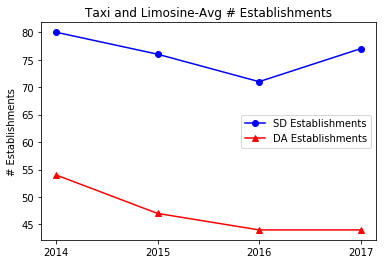

In [160]:
# Taxi & Limosine establishments plot over the past 4 years for San Diego and Dallas

sd_time_est= plt.plot(years, sd_est, color="blue",marker='o', label="SD Establishments" )
tx_time_est=plt.plot(years, tx_est, color="red",marker='^', label="DA Establishments" )

# Determining the best location for legends and adding titles/axes names
plt.legend(loc="best")
plt.title("Taxi and Limosine-Avg # Establishments")
plt.ylabel("# Establishments")
#plt.grid()

# Saving the graph as a png file
plt.savefig("Average Establishments.png")


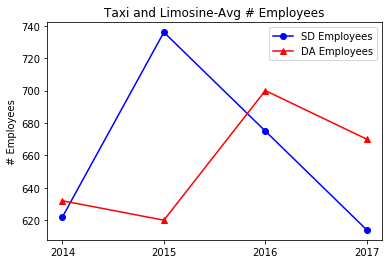

In [161]:
# Taxi & Limosine Employees plot over the past 4 years for San Diego and Dallas

sd_time_emp= plt.plot(years, sd_emp, color="blue",marker='o', label="SD Employees" )
tx_time_emp=plt.plot(years, tx_emp, color="red",marker='^', label="DA Employees" )

# Determining the best location for legends and adding titles/axes names
plt.legend(loc="best")
plt.title("Taxi and Limosine-Avg # Employees")
plt.ylabel("# Employees")
#plt.grid()

# Saving the graph as a png file
plt.savefig("Average number of Employees.png")

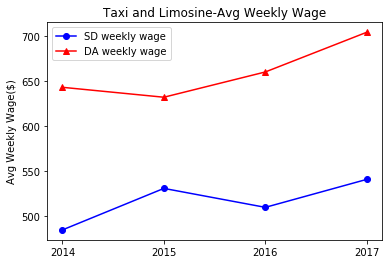

In [162]:
# Taxi & Limosine Avg Weekly wage plot over the past 4 years for San Diego and Dallas

sd_time_week_wage= plt.plot(years, sd_week_wage, color="blue",marker='o', label="SD weekly wage" )
tx_time_week_wage=plt.plot(years, tx_week_wage, color="red",marker='^', label="DA weekly wage" )

# Determining the best location for legends and adding titles/axes names
plt.legend(loc="best")
plt.title("Taxi and Limosine-Avg Weekly Wage")
plt.ylabel("Avg Weekly Wage($)")
#plt.grid()

# Saving the graph as a png file
plt.savefig("Average Weekly Wages.png")

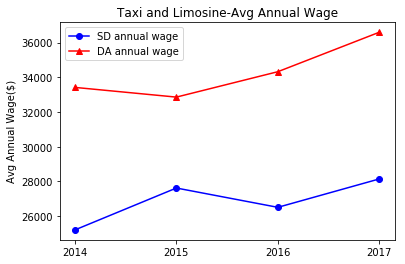

In [163]:
# Taxi & Limosine Avg Annual wage plot over the past 4 years for San Diego and Dallas

sd_time_ann_wage= plt.plot(years, sd_ann_wage, color="blue",marker='o', label="SD annual wage" )
tx_time_ann_wage=plt.plot(years, tx_ann_wage, color="red",marker='^', label="DA annual wage" )

# Determining the best location for legends and adding titles/axes names
plt.legend(loc="best")
plt.title("Taxi and Limosine-Avg Annual Wage")
plt.ylabel("Avg Annual Wage($)")
#plt.grid()

# Saving the graph as a png file
plt.savefig("Average Annual Wages.png")

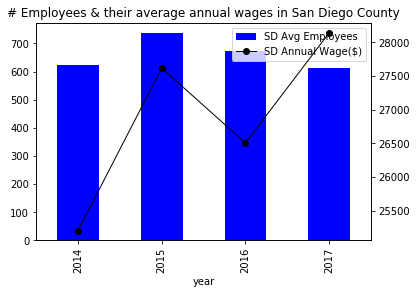

In [173]:
# Plotting multiaxes plot for # Employees and Avg Annual Salary/emp for San Diego County

fig, ax = plt.subplots()
dx=combined_df[['SD Avg Employees']].plot(kind='bar', stacked=False, title='# Employees & their average annual wages in San Diego County', 
                           color='blue', ax=ax, grid=False,label='Avg Employees')

ax2 = ax.twinx()
ax2.plot(years, combined_df[['SD Avg Annual Pay']].values, linestyle='-', marker='o', 
        color='k', linewidth=1.0, label='SD Annual Wage($)')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.yaxis.set_ticks_position("left")
ax2.yaxis.set_ticks_position("right")

# Save the graph as a png
plt.savefig("SD Employees & Wage.png")

# Preview the figure
plt.show()

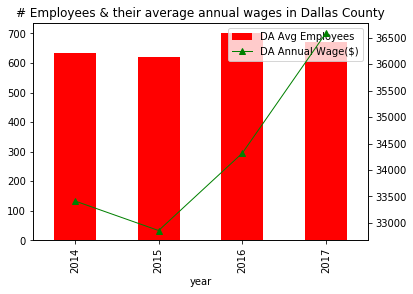

In [193]:
# Plotting multiaxes plot for # Employees and Avg Annual Salary/emp for Dallas County

fig, ax = plt.subplots()
combined_df[['DA Avg Employees']].plot(kind='bar', stacked=False, title='# Employees & their average annual wages in Dallas County', 
                           color='red', ax=ax, grid=False,label='Avg # Employees')
ax2 = ax.twinx()
ax2.plot(years, combined_df[['DA Avg Annual Pay']].values, linestyle='-', marker='^', 
        color='Green', linewidth=1.0, label='DA Annual Wage($)')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.yaxis.set_ticks_position("left")
ax2.yaxis.set_ticks_position("right")

# Save the graph as a png
plt.savefig("DA Employees & Wage.png")

# Preview the figure
plt.show()